# Unsupervised Learning:  PCA & K-Means from Scratch

## Objective:
- Implement **PCA** and **K-Means Clustering** from scratch using only `NumPy`, `Pandas`, and `Matplotlib`.
- Apply these on **Iris Dataset.csv** (excluding `Species` column for training).
- Visualize results and compare clustering output with actual labels.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("Iris Dataset.csv")

# Save 'Species' column and drop it from dataset
species = data.iloc[:, -1]
data = data.iloc[:, :-1]

# Display the first few rows
data.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3


## Preprocessing

- The dataset contains 4 numeric features and a categorical `Species` column.
- We separated `Species` since it's a label.
- The numeric data is standardized using Z-score normalization to ensure fair contribution from all features.


In [61]:
# Standardize features (Z-score normalization)
data_std = (data - data.mean()) / data.std()


## PCA (Principal Component Analysis)

- PCA reduces dimensionality while preserving variance.
- We calculate the **covariance matrix**, extract **eigenvalues & eigenvectors**, and project data on **top 3 components**.



### Perform Principal Component Analysis (PCA) on the dataset.
    """
    Parameters:
    data (array-like): The input data to be reduced.
    n_components (int): The number of principal components to retain.

    Returns:
    reduced_data (array-like): The transformed data projected onto the top principal components.
    eigenvalues (array-like): The eigenvalues corresponding to the principal components.
    """

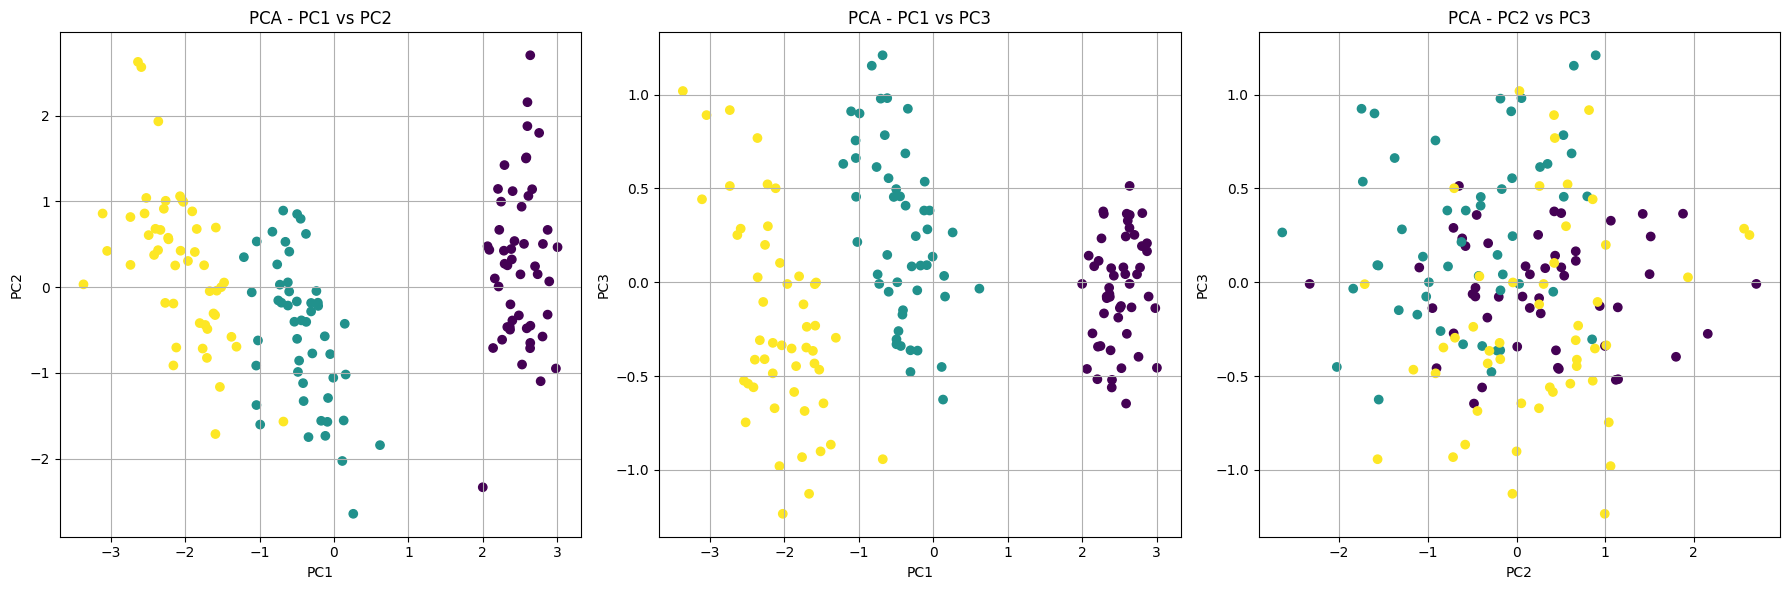

Top 3 Eigenvalues: [3.7352665  0.92176284 0.23413122]


In [62]:
def pca(data, n_components=3):
    cov_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    reduced_data = np.dot(data, eigenvectors[:, :n_components])
    return reduced_data, eigenvalues[:n_components]

# Apply PCA
reduced_data, top_eigen = pca(data_std.to_numpy())

# Create a figure with subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PCA - PC1 vs PC2
axs[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=pd.factorize(species)[0], cmap='viridis')
axs[0].set_title("PCA - PC1 vs PC2")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].grid(True)

# Plot PCA - PC1 vs PC3
axs[1].scatter(reduced_data[:, 0], reduced_data[:, 2], c=pd.factorize(species)[0], cmap='viridis')
axs[1].set_title("PCA - PC1 vs PC3")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC3")
axs[1].grid(True)

# Plot PCA - PC2 vs PC3
axs[2].scatter(reduced_data[:, 1], reduced_data[:, 2], c=pd.factorize(species)[0], cmap='viridis')
axs[2].set_title("PCA - PC2 vs PC3")
axs[2].set_xlabel("PC2")
axs[2].set_ylabel("PC3")
axs[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Eigenvalues
print("Top 3 Eigenvalues:", top_eigen)


## K-Means Clustering

- K-Means partitions data into `k` clusters based on distance to centroids.
- Steps:
  1. Randomly initialize centroids.
  2. Assign points to nearest centroid.
  3. Recalculate centroids from assignments.
  4. Repeat until convergence.



### Perform K-Means clustering on the dataset.
    """
    Parameters:
    data (array-like): The input data to be clustered.
    k (int): The number of clusters.
    max_iters (int): The maximum number of iterations for convergence.

    Returns:
    labels (array): The labels indicating the cluster assignment for each point.
    centroids (array): The final centroids of the clusters.
    """

In [63]:
def k_means(data, k=3, max_iters=100):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [64]:
data_np = data_std.to_numpy()
labels, final_centroids = k_means(data_np, k=3)


## K-Means Clustering vs Actual Species Distribution

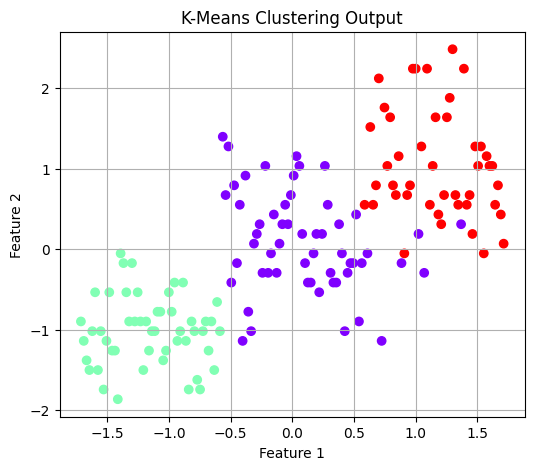

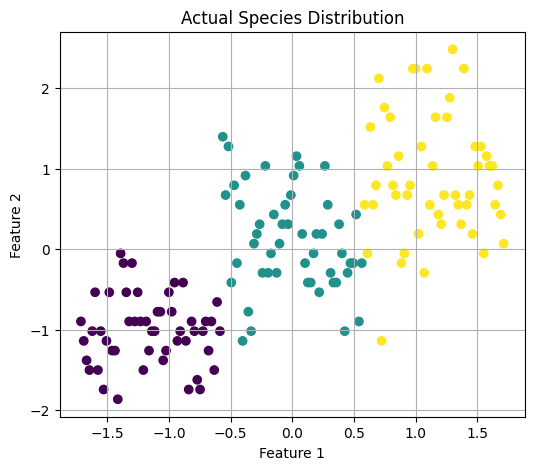

In [65]:
# K-Means Result Plot
plt.figure(figsize=(6,5))
plt.scatter(data_np[:, 0], data_np[:, 1], c=labels, cmap='rainbow')
plt.title("K-Means Clustering Output")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Actual Species Plot
plt.figure(figsize=(6,5))
plt.scatter(data_np[:, 0], data_np[:, 1], c=pd.factorize(species)[0], cmap='viridis')
plt.title("Actual Species Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Conclusion

- Implemented **PCA** and **K-Means** without any ML libraries.
- Visualized PCA and compared cluster labels with real species.
- Algorithms are fully functional using only core Python libraries.
